In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans

dataset = pd.read_csv('./dataset_lab2.csv')

In [2]:
dataset.describe()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,6.465050,4.370573,6.911537,3.597249,3.687242,3.220883,64.662823,3.182339,3.922998,2.930024
std,121.387808,5.383455,2.854617,5.878477,2.186747,1.997908,2.023581,37.838145,2.080827,2.318431,2.185673
min,0.000000,0.985000,1.140000,1.409000,1.000000,1.183000,0.930000,5.500000,0.870000,0.777000,0.660000
25%,104.750000,2.517000,2.190000,2.805000,1.870000,2.129750,1.715000,36.417500,1.565000,2.303500,1.425000
50%,209.500000,4.418000,3.500000,4.371000,2.945000,3.113000,2.520000,52.120000,2.490000,3.174000,2.230000
75%,314.250000,9.031000,5.810000,9.752000,4.770000,4.712000,4.135000,82.870000,4.255000,5.025000,3.500000
max,419.000000,42.000000,17.840000,42.200000,12.000000,11.707000,11.640000,240.000000,11.030000,17.500000,14.090000


In [3]:
# Retirando valores ausentes
dataset.dropna(inplace=True)
dataset.describe()


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,207.987893,6.487487,4.381235,6.919741,3.606538,3.682245,3.221768,64.615642,3.182324,3.930981,2.944891
std,121.199236,5.405608,2.861460,5.892949,2.190150,1.989936,2.021169,37.977929,2.084124,2.327270,2.194744
min,0.000000,0.985000,1.140000,1.409000,1.000000,1.183000,0.930000,5.500000,0.870000,0.777000,0.660000
25%,103.000000,2.536000,2.200000,2.816000,1.870000,2.135000,1.720000,36.350000,1.560000,2.305000,1.430000
50%,209.000000,4.418000,3.500000,4.371000,2.960000,3.109000,2.520000,51.880000,2.490000,3.174000,2.240000
75%,312.000000,9.049000,5.820000,9.752000,4.770000,4.709000,4.110000,82.870000,4.250000,5.044000,3.520000
max,419.000000,42.000000,17.840000,42.200000,12.000000,11.707000,11.640000,240.000000,11.030000,17.500000,14.090000


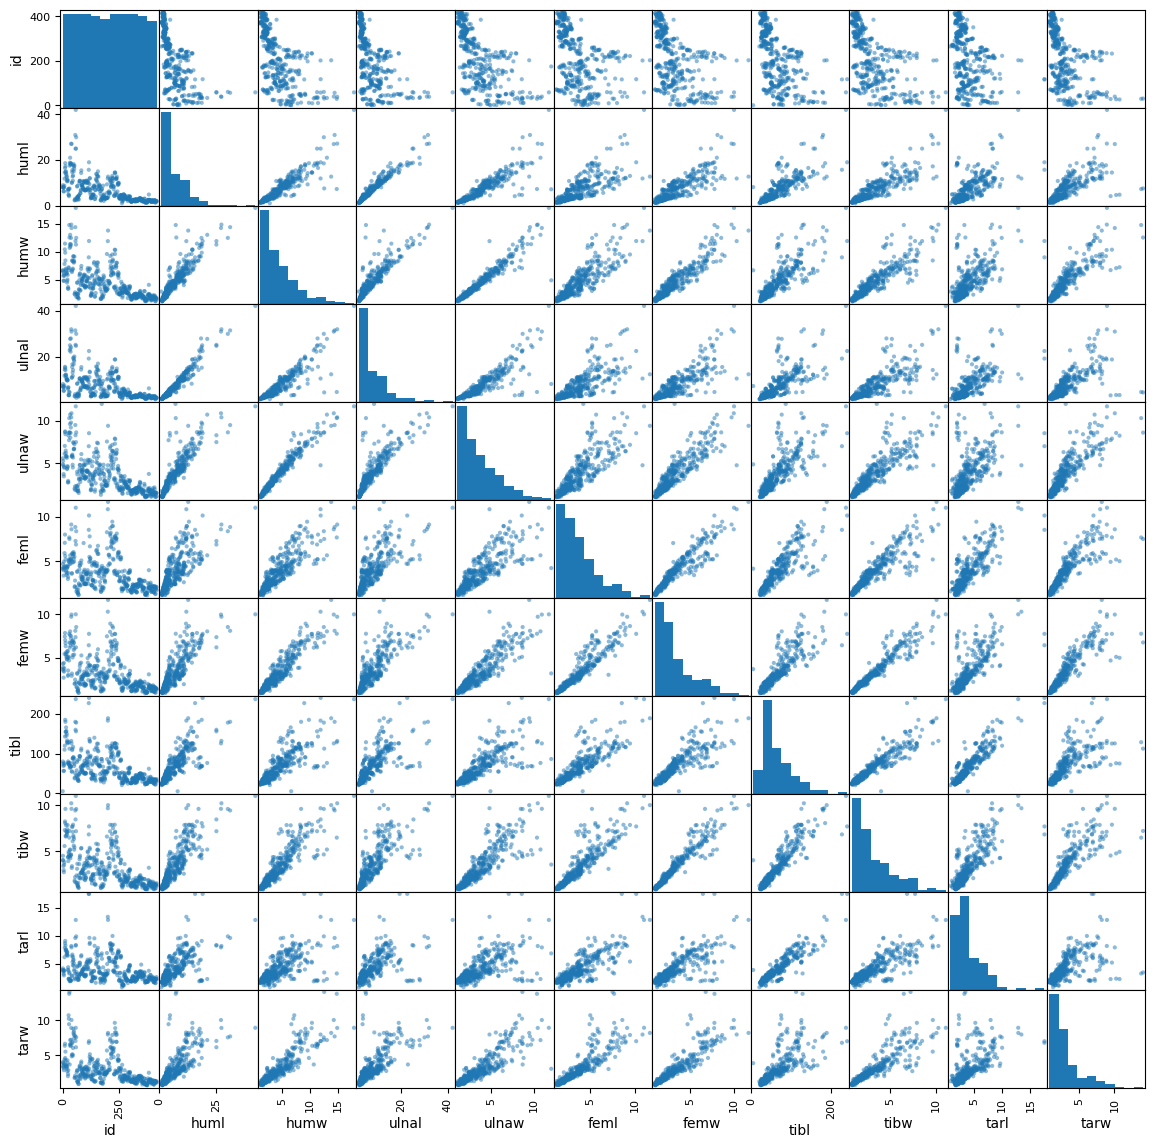

In [4]:
# Criando matriz de dispersão
scatter_matrix(dataset, alpha=0.5, figsize=(14, 14), diagonal='hist')
plt.show()

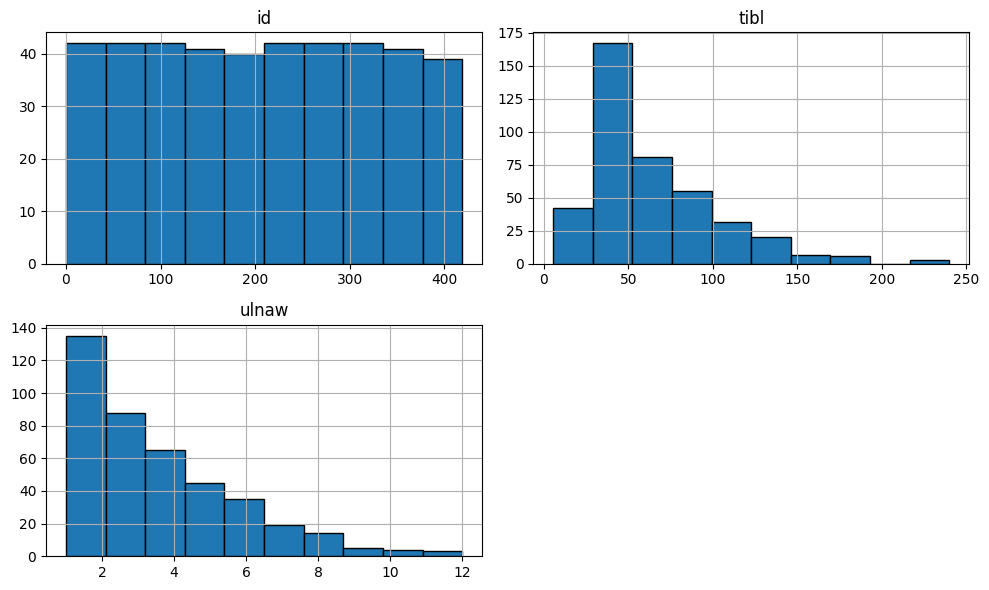

In [5]:
# Plotar histogramas para cada colun
dataset[['id','tibl','ulnaw']].hist(bins=10, figsize=(10, 6), edgecolor='black')

# Ajustar layout
plt.tight_layout()
plt.show()

In [6]:
# retirando a coluna ID
dataset.drop(columns=['id'],axis=1,inplace=True)

# Normalizando todas as colunas do dataset
dataset.max()
dataset_normalizado = dataset / dataset.max()
dataset_normalizado

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0.192333,0.374439,0.170640,0.406667,0.357137,0.317869,0.022917,0.365367,0.221143,0.272534
1,0.211690,0.371637,0.190829,0.465833,0.401811,0.369416,0.334250,0.408885,0.237143,0.284599
2,0.190405,0.357063,0.164123,0.440000,0.367900,0.335052,0.313958,0.366274,0.218914,0.237048
3,0.184881,0.319507,0.155829,0.397500,0.342018,0.302405,0.288208,0.308250,0.204457,0.242016
4,0.149524,0.271300,0.123436,0.310833,0.289997,0.233677,0.234458,0.268359,0.182171,0.222143
...,...,...,...,...,...,...,...,...,...,...
415,0.042762,0.091368,0.045616,0.110833,0.156829,0.132302,0.130208,0.120580,0.125657,0.081618
416,0.045738,0.091928,0.049194,0.124167,0.164346,0.124570,0.138375,0.116047,0.134857,0.081618
417,0.044738,0.091368,0.046991,0.127500,0.179038,0.122852,0.143542,0.127833,0.130629,0.085877
418,0.048524,0.099776,0.053389,0.125000,0.182370,0.127148,0.150375,0.138713,0.148457,0.088006


In [7]:
# dataframe para armazenar os valores do kmeans
df = pd.DataFrame(dataset)

In [12]:
# Aplicando K-MEANS com 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=50)
df['Cluster_2'] = kmeans_2.fit_predict(dataset)

# Aplicando K-MEANS com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=50)
df['Cluster_3'] = kmeans_3.fit_predict(dataset)

# Aplicando K-MEANS com 6 clusters
kmeans_6 = KMeans(n_clusters=6, random_state=50)
df['Cluster_6'] = kmeans_6.fit_predict(dataset)

# Aplicando K-MEANS com 9 clusters
kmeans_9 = KMeans(n_clusters=9, random_state=50)
df['Cluster_9'] = kmeans_9.fit_predict(dataset)

